# Workbook #2: Variables and Regression
Learning outcomes:
*Students will be able to define variable and differential between types of variables in theory and coding.
*Student will be able to convert variables between datatypes in Stata.
This workbook will cover important information variables.  about univariate statistics and regression review.

<img src="https://healthitanalytics.com/images/site/features/_normal/ThinkstockPhotos-645261596.jpg" width=300 height=300 />

### Variables in social statistics
When you hear the word variable--what comes to mind?

In social statistics, we generally have two kinds of variables:
* Categorical variables are variables similar to discrete variables, where the values are categories/boundaries. For example, race or state (Alabama, Oregon, etc...). 
* Numeric variables are variables similar to contiunous variables, where the values have numeric value to them. For example, percent of Latinx residents or birthweight of child. 

Categorical variables need to handle with more care as compared to numeric variables. For example, you cannot find the mean. You can find the mode of categorical variables. 

You can do a lot of statistics with numeric variables because you can treat them like numbers. You can find the mean and standard deviation. Just keep in mind and always ask yourself...what does it mean?

<div class="alert alert-block alert-warning">
Depending on the variable type, they have to be used and interpreted differently in statistics. So always think through what type of variables you are working with.</div>

<img src="http://cdn.mos.cms.futurecdn.net/sdSHp2akMYc4EoZAoRE77k.jpg" width=300 height=300 />

## Variables in coding and Stata code
It is important to understand how variables are handle in coding and Stata code. Here we will cover variable types and storage types.

<img src="https://static.semrush.com/blog/uploads/media/cd/34/cd34e2cb04a60d0d027c033e64591477/types-of-content-marketing.svg" width=300 height=300 />

### Variable types
Each coding language has it own datatypes. Generally, there is are numeric (have actual number meaning) and string (have meaning in characters and texts). Keep in mind that each coding language has more specific datatypes. Let's review the Stata datatypes:
* Numeric variables -- These variables are numbers (similar to previous definition). You can do calculations with numeric variables like mean or standard deviation. In data view, numeric variables are displayed in black text.
* String variables -- These variables are characters or text. String can be in double quotes. In data view, string variables are displayed in red text.
* Numeric variables with string labels -- These are special Stata-only variable that are denoted in blue in the data viewer. They are saved as numeric variable and have string label attached to them. You can manually add labels or get this by using the encode command (discussed below).

<img src="https://ophtek.com/wp-content/uploads/2018/04/data-storage.jpg" width=300 height=300 />

### Storage types
Data takes space or storage on your computer. Each coding language has different space formats. Stata's data format is:

| Storage type | Min | Max | Closest to 0 without being 0 | Bytes |
| --- | --- | --- | --- | --- |
| byte | -127 | 100 | +/-1 | 1 |
| int | -32,767 | 32,740 | +/-1 | 2 |
| long | -2,147,483,647 | 2,147,483,620 | +/-1 | 3 |
| float | -1.70141173319 x 10^38 | 1.70141173319 x 10^38 | +/-10^-38 | 4 |
| double | -8.9884656743 x 10^307 | +8.9884656743 x 10^37 | +/-10^-323 | 5 |

<i>Don't confuse integer in the numeric sense with the "integer" storage type in Stata. Stata also recognizes time. We will cover that more in panel analysis

String variables are stored as str1, str2, ..., str2045, and strL. Where the number after "str" indicates the length of the string variable.

<B>IT IS SO IMPORTANT TO KNOW YOUR VARIABLE TYPES AND STORAGE TYPES. SOME CODES ONLY WORK FOR SPECIFIC DATA AND STORAGE TYPES.

In [2]:
use "https://www.stata-press.com/data/r17/census12.dta", clear

*the describe command will give you summary of the data type of your variables
describe


(1980 Census data by state)


Contains data from https://www.stata-press.com/data/r17/census12.dta
  obs:            50                          1980 Census data by state
 vars:             7                          6 Apr 2020 15:43
 size:         1,950                          
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
state           str14   %14s                  State
state2          str2    %-2s                  Two-letter state abbreviation
region          str7    %9s                   Census region
pop             long    %10.0g                Population
median_age      float   %9.2f                 Median age
marriage_rate   float   %9.0g                 
divorce_rate    float   %9.0g                 
----------------------------------------------------------

<img src="https://files.realpython.com/media/Pythonic-Data-Cleaning-With-Pandas-and-NumPy_Watermarked.0eccf29b6622.jpg" width=300 height=300 />

## Cleaning data tricks
Sometimes the data we get is messy and we have clean it before we can even calculate mean. I want to show you two important codes for cleaning variable types.
### ENCODE
* encode -- makes a string variable into a numeric. For example, let's say we have survey data with a question of "Are you a smoker" Yes/No. Encode will create a new variable where "Yes" gets a value for it and "No" gets a value for it. When a variable has been "encoded" it is displayed in blue text.

In [3]:
*This opens the data
use https://www.stata-press.com/data/r17/hbp2, clear
*This code prints a descriptive of the dataset.
desc




Contains data from https://www.stata-press.com/data/r17/hbp2.dta
  obs:         1,130                          
 vars:             7                          3 Mar 2020 06:47
 size:        24,860                          
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
id              str10   %10s                  Record identification number
city            byte    %8.0g                 City
year            int     %8.0g                 Year
age_grp         byte    %8.0g      agefmt     Age group
race            byte    %8.0g      racefmt    Race
hbp             byte    %8.0g      yn         High blood pressure
sex             str6    %9s                   Sex
--------------------------------------------------------------------------------
Sorted by: 


In [4]:
list in 1/5


     +-----------------------------------------------------------+
     |         id   city   year   age_grp    race   hbp      sex |
     |-----------------------------------------------------------|
  1. | 8008238923      1   1993     15–19   Black    No   female |
  2. | 8007143470      1   1992     30–34       .    No          |
  3. | 8000468015      1   1988     25–29   Black    No     male |
  4. | 8006167153      1   1991     25–29   Black    No     male |
  5. | 8006142590      1   1991     20–24   Black    No   female |
     +-----------------------------------------------------------+


<b>The variable <i>sex</i> is a string datatype.

In [7]:
*This is an example of using encode
encode sex, gen(sex_numeric) label("Respondent's sex (numeric)")

In [8]:
*Let's see if there was a change
list in 1/5
desc



     +----------------------------------------------------------------------+
     |         id   city   year   age_grp    race   hbp      sex   sex_nu~c |
     |----------------------------------------------------------------------|
  1. | 8008238923      1   1993     15–19   Black    No   female     female |
  2. | 8007143470      1   1992     30–34       .    No                   . |
  3. | 8000468015      1   1988     25–29   Black    No     male       male |
  4. | 8006167153      1   1991     25–29   Black    No     male       male |
  5. | 8006142590      1   1991     20–24   Black    No   female     female |
     +----------------------------------------------------------------------+


Contains data from https://www.stata-press.com/data/r17/hbp2.dta
 Observations:         1,130                  
    Variables:             8                  3 Mar 2020 06:47
--------------------------------------------------------------------------------
Variable      Storage   Display    Val

In [10]:
codebook sex_numeric


--------------------------------------------------------------------------------
sex_numeric                                                                  Sex
--------------------------------------------------------------------------------

                  Type: Numeric (long)
                 Label: Respondent's sex (numeric), but label does not exist

                 Range: [1,2]                         Units: 1
         Unique values: 2                         Missing .: 2/1,130

            Tabulation: Freq.  Value
                          433  1
                          695  2
                            2  .


In [11]:
codebook race


--------------------------------------------------------------------------------
race                                                                        Race
--------------------------------------------------------------------------------

                  Type: Numeric (byte)
                 Label: racefmt

                 Range: [1,3]                         Units: 1
         Unique values: 3                         Missing .: 4/1,130

            Tabulation: Freq.   Numeric  Label
                          196         1  White
                          773         2  Black
                          157         3  Hispanic
                            4         .  


<b> Now, the variable sex_numeric is numeric data type with string labels so Stata can run analyses. Race is similar because they are denoted by blue text and in the describe printout you can see their storage type is numeric.

### DESTRING
* destring -- converts a variable from a string to numeric variable. This only works if the string variable ONLY has numbers. Sometimes when you put data into Stata, it converts the variable to a string.

In [12]:
*Reading in data and asking for description of data
use http://www.stata-press.com/data/r13/destring2, clear
desc
list in 1/5




Contains data from http://www.stata-press.com/data/r13/destring2.dta
 Observations:            10                  
    Variables:             3                  3 Mar 2013 22:50
--------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
--------------------------------------------------------------------------------
date            str14   %10s                  
price           str11   %11s                  
percent         str3    %9s                   
--------------------------------------------------------------------------------
Sorted by: 


     +------------------------------------+
     |       date         price   percent |
     |------------------------------------|
  1. | 1999 12 10     $2,343.68       34% |
  2. | 2000 07 08     $7,233.44       86% |
  3. | 1997 03 02    $12,442.89       12% |
  4. | 1999 09 00   $233,325.31        6% |
  5. | 199

<b>All variable in this dataset are string</b>

In [14]:
destring price, generate(price3)

price: contains nonnumeric characters; no generate


In [15]:
/*Code for destring
You could use either one of these codes. Note that the second one REPLACES the string variable with the numeric variable.*/
destring date price percent, generate(date2 price2 percent2) ignore("$ ,%")

*destring date price percent, ignore("$ ,%") replace

date: character space removed; date2 generated as long
price: characters $ , removed; price2 generated as double
percent: character % removed; percent2 generated as byte


In [6]:
*Let's make sure it worked.
desc
list in 1/5



Contains data from http://www.stata-press.com/data/r13/destring2.dta
 Observations:            10                  
    Variables:             6                  3 Mar 2013 22:50
--------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
--------------------------------------------------------------------------------
date            str14   %10s                  
date2           long    %10.0g                
price           str11   %11s                  
price2          double  %10.0g                
percent         str3    %9s                   
percent2        byte    %10.0g                
--------------------------------------------------------------------------------
Sorted by: 
     Note: Dataset has changed since last saved.


     +----------------------------------------------------------------------+
     |       date      date2         price      pri

<img src="https://pic.onlinewebfonts.com/svg/img_347619.png" width=300 height=300 />

## Practice time
You want to examine racial and ethnic breakdown of incarceration. You find this excel file of data for 2010. Unfortunately, when you read the file into Stata, it all messy. Your job is clean it so we can use the data.

In [1]:
*First, you must read in the file from the web.
import excel "https://www.prisonpolicy.org/data/race_ethnicity_gender_2010.xlsx", ///
    sheet(Total) clear

In [17]:
list in 59/61


     +-------------------------------------------------------------------------+
 59. |      A  | B  | C  |                                                  D  |
     | Source  |    |    | Census 2010, Summary File 1, Table PCT20, Column 3  |
     |-------------------------------------------------------------------------|
     |                                                             E           |
     |           Census 2010, Summary File 1, Table PCT20A, Column 3           |
     |-------------------------------------------------------------------------|
     |                                                             F           |
     |           Census 2010, Summary File 1, Table PCT20B, Column 3           |
     |-------------------------------------------------------------------------|
     |                                                             G           |
     |           Census 2010, Summary File 1, Table PCT20C, Column 3           |
     |---------------------

     |                                                                         |
     |-------------------------------------------------------------------------|
     |                                                             H           |
     |                                                                         |
     |-------------------------------------------------------------------------|
     |                                                             I           |
     |                                                                         |
     |-------------------------------------------------------------------------|
     |                                                             J           |
     |                                                                         |
     |-------------------------------------------------------------------------|
     |                                                             K           |
     |                      

     |                                                             K           |
     |                                                                         |
     |-------------------------------------------------------------------------|
     |                                                             L           |
     |                                                                         |
     |-------------------------------------------------------------------------|
     |                                                       M     |     N     |
     |                                                             |           |
     |-------------------------------------------------------------------------|
     |                                                           O             |
     |                                                                         |
     |-------------------------------------------------------------------------|
     |                      

In [18]:
*Second, you drop the observations or rows that are not necessary.
drop in 59/61
drop in 1/4


(3 observations deleted)

(4 observations deleted)


In [19]:
*Third, you only want to keep the information about racial and ethnic identity. So you drop the rest of the variables.
keep A B C D E F G H I J K L

In [20]:
*Fourth, you need to rename the variables with useful names
rename A geoid
rename B geoid2
rename C state
rename D tot_incar
rename E wht_incar
rename F blk_incar
rename G indig_incar
rename H asian_incar
rename I hawpi_incar
rename J other_incar
rename K multirace_incar
rename L lat_incar

In [21]:
*Row 1 just has the variable names so you can drop it now that you are done cleaning
drop in 1

(1 observation deleted)


In [22]:
list in 1/5


     +-----------------------------------------------------------------------+
  1. |       geoid | geoid2 |         state | tot_in~r | wht_in~r | blk_in~r |
     |   0100000US |        | United States |  2263602 |  1139749 |   897875 |
     |-----------------------------------------------------------------------|
     | indig_~r  | asian_~r  | hawpi_~r  | other_~r  | multir~r  | lat_in~r  |
     |    37854  |    16928  |     5494  |   142908  |    22794  |   419509  |
     +-----------------------------------------------------------------------+

     +-----------------------------------------------------------------------+
  2. |       geoid | geoid2 |         state | tot_in~r | wht_in~r | blk_in~r |
     | 0400000US01 |      1 |       Alabama |    41177 |    18087 |    22377 |
     |-----------------------------------------------------------------------|
     | indig_~r  | asian_~r  | hawpi_~r  | other_~r  | multir~r  | lat_in~r  |
     |       80  |       57  |        3  |      28

## Using encode and destring codes, do the following:
* Q1: Using the same file from practice. What kind of datatype is the variable state? Write a code to convert the state variable a numeric variable.
* Q2: Convert all the incarceration population variables into numeric.
* Q3: Make a % white people incaceration variable, % Black people incaceration variable, % Indigenous people incaceration variable, and % Latinx people incaceration variable.
* Q4: Print summary statistics of % white people incaceration variable, % Black people incaceration variable, % Indigenous people incaceration variable, and % Latinx people incaceration variable.
* Q5: Write a sentence comparing the incaceration statistics to the general population statistics. The [Census](https://www.census.gov/quickfacts/fact/table/US/PST045221) statistics on racial/ethnic percentage in U.S. are:
    * White: 75.8%
    * Black: 13.6%, 
    * American Indian and Alaska Native: 1.3%
    * Latinx: 18.9%
* Q6: Save the data.

Who will share their code?

In [23]:
*This is one way to transform the string variables into numeric variables.
destring tot_incar, replace
destring wht_incar, replace
destring blk_incar, replace
destring indig_incar, replace
destring asian_incar, replace
destring hawpi_incar, replace
destring other_incar, replace
destring multirace_incar, replace
destring lat_incar, replace
*You will know it worked, if in data view, the variables are displayed in black text color.


tot_incar: all characters numeric; replaced as long

wht_incar: all characters numeric; replaced as long

blk_incar: all characters numeric; replaced as long

indig_incar: all characters numeric; replaced as long

asian_incar: all characters numeric; replaced as int

hawpi_incar: all characters numeric; replaced as int

other_incar: all characters numeric; replaced as long

multirace_incar: all characters numeric; replaced as int

lat_incar: all characters numeric; replaced as long


In [24]:
*Next, this is one way to make the string variable of "state" into a numeric variable
encode state, gen(state_num) label("State (numeric variable)")
*You will know if worked if state is in blue text color.

In [25]:
*Let's make sure it worked
desc


Contains data
 Observations:            53                  
    Variables:            13                  
--------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
--------------------------------------------------------------------------------
geoid           str63   %63s                  
geoid2          str6    %9s                   
state           str20   %20s                  
tot_incar       long    %10.0g                
wht_incar       long    %10.0g                
blk_incar       long    %10.0g                
indig_incar     long    %10.0g                
asian_incar     int     %10.0g                
hawpi_incar     int     %10.0g                
other_incar     long    %10.0g                
multirace_incar int     %10.0g                
lat_incar       long    %10.0g                
state_num       long    %20.0g     State (numeric variable)
   

In [26]:
gen wht_per=(100*wht_incar)/tot_incar
gen blk_per=(100*blk_incar)/tot_incar
gen indig_per=(100*indig_incar)/tot_incar
gen lat_per=(100*lat_incar)/tot_incar

summ wht_per blk_per indig_per lat_per







    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
     wht_per |         53    55.42296    17.80663   5.669816   89.83419
     blk_per |         53    32.74913    20.98107   2.716373   87.43746
   indig_per |         53    4.141851    7.938771   .0929224   37.54161
     lat_per |         53     15.2114     16.0398    1.87551   97.62694


In [23]:
*Let's save our data
save "incarceration2010 1 24 23.dta", replace

file incarceration2010 1 27 22.dta saved


# Modeling and regression
In social statistics, we are using variables to understand social issues or social patterns. We are using modeling to understand these important topics. The following things are important when modeling:
* Dependent variable - the variable we are interested in explaining
* Independent variable - the predictor variable, the variable we want to show is important in explaining the dependent variable.
* Shape of the relationship - linear, curvilinear, exponential, etc...
* Direction of the relationship - positive, negative, zero
* How likely is the relationship is due to "truth" and not random chance - statistical significant

We model relationships in society to explain/evaluate social theories. We use hypothesis testing and regression to examine those models or relationships.

### Simple Linear Regression


<center>$Y_{i} = \beta_{0} + \beta_{1}(x_{i}) + e_{0i}$ 
    
where

$Y$ is dependent/outcome variable, the variable you are interested in explaining

$i$ is the observation

$\beta_{0}$ is the intercept (or constant), usually the overall mean

$\beta_{1}$ is the independent variable or predictor vaariable

$x_{i}$ is the value of $\beta_{1}$ for observation $i$
    
$e_{0i}$ is the error of the prediction or residual between the actual value and predicted value

Assumptions of model:
* Linearity -- the relationship must a linear among the parameter ($\beta$). Mathematically this means $E(Y) = X \beta$ and $E(\epsilon|X) = 0$
* Normality -- The errors are normally distrbuted: $\epsilon_{i} ~ N(0, \sigma^{2}_{\epsilon})$
* Homoscedasticity -- equal variance $Var(\epsilon|X) = \sigma^{2}$
* Independence -- Errors do not correlate with variables ($X$). $Cov(\epsilon_i , \epsilon_j| X) =0$

For regression diagonistics, they can be done either visually or through a test. Also, there are many ways to look at this.

In [5]:
use "https://stats.idre.ucla.edu/stat/stata/webbooks/reg/crime", clear

desc


(crime data from agresti & finlay - 1997)


Contains data from https://stats.idre.ucla.edu/stat/stata/webbooks/reg/crime.dta
  obs:            51                          crime data from agresti & finlay
                                                - 1997
 vars:             9                          24 Feb 2001 14:23
 size:         1,683                          
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
sid             float   %9.0g                 
state           str3    %9s                   
crime           int     %8.0g                 violent crime rate
murder          float   %9.0g                 murder rate
pctmetro        float   %9.0g                 pct metropolitan
pctwhite        float   %9.0g                 pct white
pcths           float   %9.0g

In [3]:
regress crime pctmetro poverty single


      Source |       SS           df       MS      Number of obs   =        51
-------------+----------------------------------   F(3, 47)        =     82.16
       Model |  8170480.21         3   2723493.4   Prob > F        =    0.0000
    Residual |  1557994.53        47  33148.8199   R-squared       =    0.8399
-------------+----------------------------------   Adj R-squared   =    0.8296
       Total |  9728474.75        50  194569.495   Root MSE        =    182.07

------------------------------------------------------------------------------
       crime |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
    pctmetro |   7.828935   1.254699     6.24   0.000     5.304806    10.35306
     poverty |   17.68024    6.94093     2.55   0.014     3.716893     31.6436
      single |   132.4081   15.50322     8.54   0.000     101.2196    163.5965
       _cons |  -1666.436    147.852   -11.27   0.

## Linearity
Best way to check linearity is to make visuals of the standardized residuals with each predictor of the regression model.

In [6]:
quietly regress crime pctmetro poverty single
predict r, resid

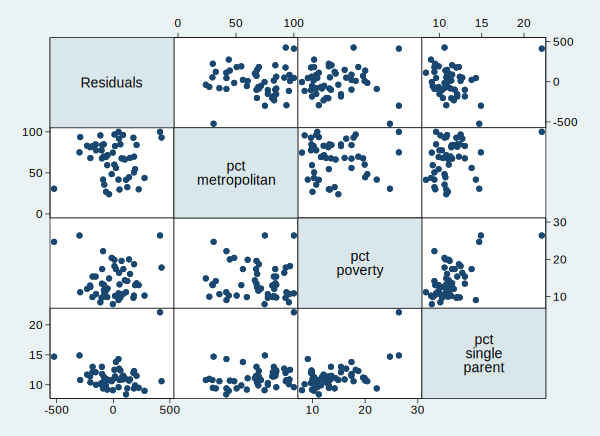

In [7]:
graph matrix r pctmetro poverty single

It looks like there are some outliers poverty and single parent. Let's zoom in and label

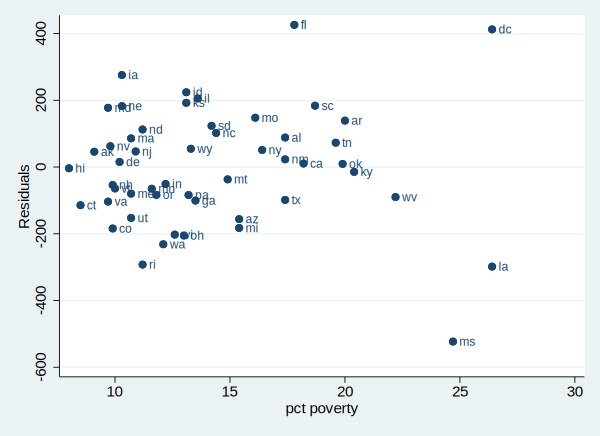

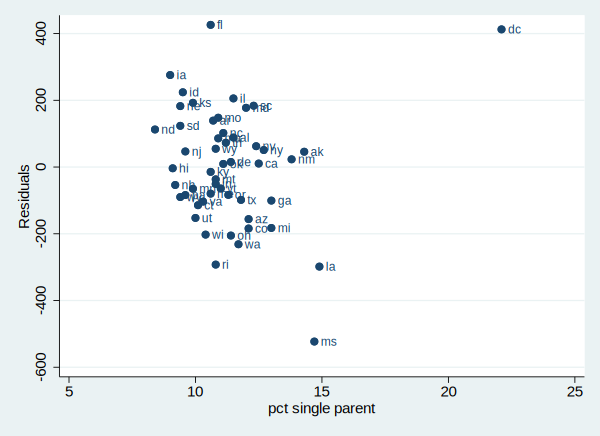

In [7]:
scatter r poverty, mlabel(state)
scatter r single, mlabel(state)

DC is definitively a outlier. LA and MS are possible outliers. I would run the model without DC as a robust check.

## Normality
To assess normality, you can use a Q-Q plot (quantile-quantile plot). 

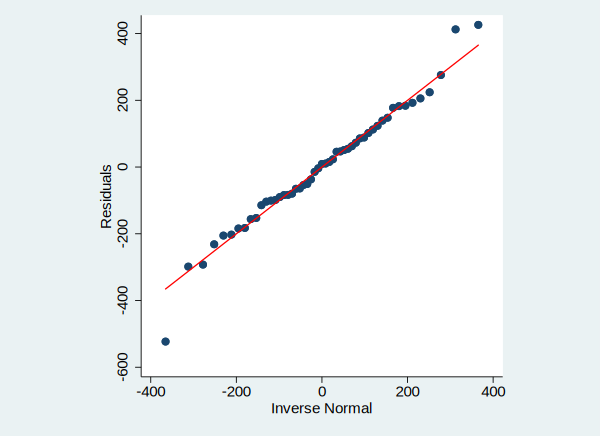

In [13]:
qnorm r, rlopts(lcolor(red)) aspect(1)

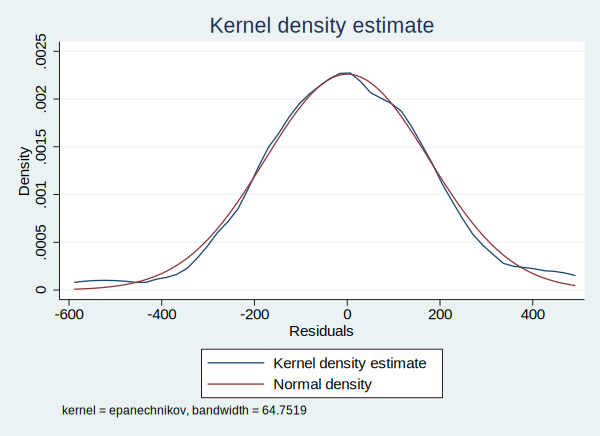

In [16]:
kdensity r, normal

In [17]:
swilk r


                   Shapiro-Wilk W test for normal data

    Variable |        Obs       W           V         z       Prob>z
-------------+------------------------------------------------------
           r |         51    0.98421      0.754    -0.602    0.72642


We fail to reject the hypothesis that r is normally distribution.

## Homoscedasticity
One way to examine is to look visually at the residuals and fitted values.

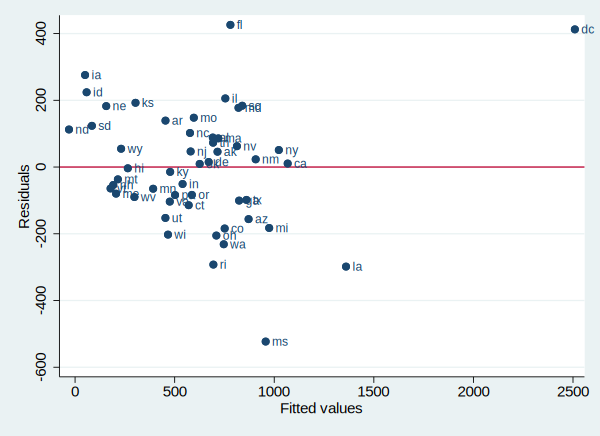

In [5]:
rvfplot, yline(0) mlabel(state)

In [14]:
estat imtest
estat hettest



Cameron & Trivedi's decomposition of IM-test

---------------------------------------------------
              Source |       chi2     df      p
---------------------+-----------------------------
  Heteroskedasticity |      26.80      9    0.0015
            Skewness |       8.48      3    0.0370
            Kurtosis |       1.21      1    0.2716
---------------------+-----------------------------
               Total |      36.49     13    0.0005
---------------------------------------------------


Breusch-Pagan / Cook-Weisberg test for heteroskedasticity 
         Ho: Constant variance
         Variables: fitted values of crime

         chi2(1)      =    12.86
         Prob > chi2  =   0.0003


Some evidence of heterskedastcity. Again, it is due to outlier of DC and possibility LA and MS.

## Independence
Usually need to check with spatial, temporal, or group autocorrelation. We learn more about later.

## Multicollinearity
When indpendent variables are correlated with each and can predict each other. Variance inflation factor (VIF) is calculated by $\frac{1}{1-R^2}$ with each variable predicted on the other variables. The rule of thumb is for the the VIF is less than 10.

In [19]:
vif


    Variable |       VIF       1/VIF  
-------------+----------------------
      single |      1.63    0.612873
     poverty |      1.53    0.654829
    pctmetro |      1.14    0.873510
-------------+----------------------
    Mean VIF |      1.43


<img src="http://cdn.onlinewebfonts.com/svg/img_431471.png" width=300 height=300 />

### Practice

In [8]:
*First, we need to import .dta file from the web
use "https://www.stata-press.com/data/r17/lbw.dta", clear
desc


(Hosmer & Lemeshow data)


Contains data from https://www.stata-press.com/data/r17/lbw.dta
  obs:           189                          Hosmer & Lemeshow data
 vars:            11                          15 Jan 2020 05:01
 size:         2,646                          
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
id              int     %8.0g                 Identification code
low             byte    %8.0g                 Birthweight<2500g
age             byte    %8.0g                 Age of mother
lwt             int     %8.0g                 Weight at last menstrual period
race            byte    %8.0g      race       Race
smoke           byte    %9.0g      smoke      Smoked during pregnancy
ptl             byte    %8.0g                 Premature labor history (coun

<b>Q: What does this tell us? Can anyone say anything about this data from this output?</b>

This data has 189 observations and 11 variables. Based on the variable labels, we can see this is a health data.

<b>Q: Which variables are categorical? Which variables are numeric? Explain. </b>

Numeric (in traditional sense): low, age, lwt, bwt, ptl, and ftv

Categorical (in traditional sense): race, smoke (both variables are displayed in blue meaning they are categorical variables with numeric values).

low, ht, and ui seem to be categorical variables but are coded are numeric. For example:
* low is coded 1 if bwt<2500
* ht is coded 1 for yes
* ui is coded 1 for yes

In [13]:
regress bwt age


      Source |       SS           df       MS      Number of obs   =       189
-------------+----------------------------------   F(1, 187)       =      1.51
       Model |  800428.169         1  800428.169   Prob > F        =    0.2207
    Residual |  99114870.4       187  530026.045   R-squared       =    0.0080
-------------+----------------------------------   Adj R-squared   =    0.0027
       Total |  99915298.6       188  531464.354   Root MSE        =    728.03

------------------------------------------------------------------------------
         bwt |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         age |   12.31444   10.02079     1.23   0.221     -7.45389    32.08277
       _cons |   2658.122   238.8097    11.13   0.000     2187.014    3129.229
------------------------------------------------------------------------------


In [10]:
predict r, resid

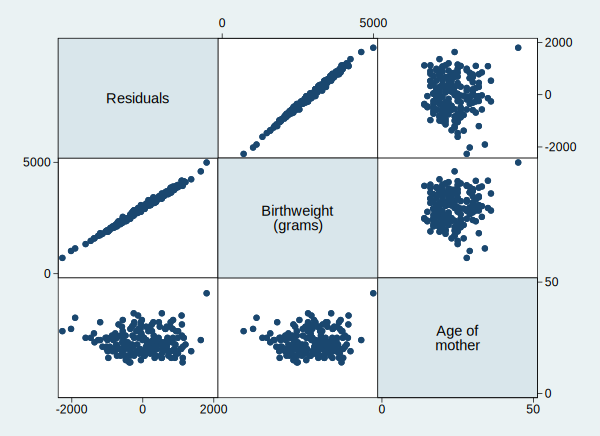

In [14]:
*linearity
graph matrix r bwt age

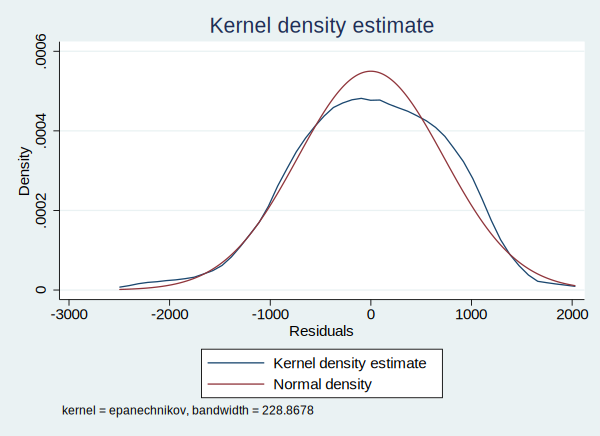





                   Shapiro-Wilk W test for normal data

    Variable |        Obs       W           V         z       Prob>z
-------------+------------------------------------------------------
           r |        189    0.99018      1.394     0.763    0.22277


In [16]:
*Normality
kdensity r, normal

swilk r

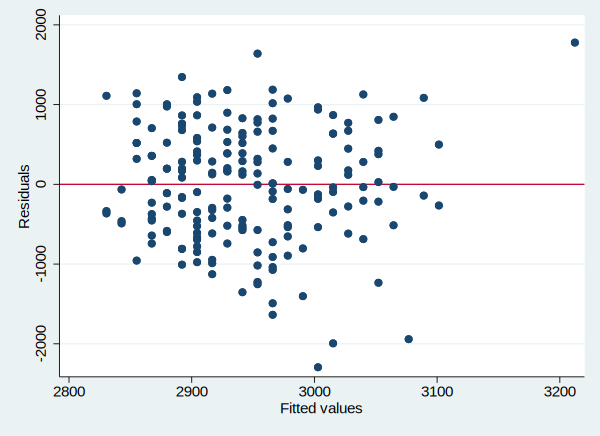





Cameron & Trivedi's decomposition of IM-test

---------------------------------------------------
              Source |       chi2     df      p
---------------------+-----------------------------
  Heteroskedasticity |       9.58      2    0.0083
            Skewness |       4.07      1    0.0437
            Kurtosis |       0.02      1    0.8844
---------------------+-----------------------------
               Total |      13.67      4    0.0084
---------------------------------------------------


Breusch-Pagan / Cook-Weisberg test for heteroskedasticity 
         Ho: Constant variance
         Variables: fitted values of bwt

         chi2(1)      =     7.14
         Prob > chi2  =   0.0075


In [18]:
tab 

<b>Q: What does this tell us?</b>

This tells us that 39.15% of the sample are smokers.

## We cannot take mean or standard deviation of categorical variables. We can examine mean statistics of a numeric variable across categorical variable.

In [30]:
*We can examine statistics across another variable. (This is more bivariate statistics)
tabstat bwt, by(smoke) stat(mean sd min median max)


Summary for variables: bwt
Group variable: smoke (Smoked during pregnancy)

    smoke |      Mean        SD       Min       p50       Max
----------+--------------------------------------------------
Nonsmoker |  3054.957   752.409      1021      3100      4990
   Smoker |  2772.297  659.8075       709    2775.5      4238
----------+--------------------------------------------------
    Total |  2944.286   729.016       709      2977      4990
-------------------------------------------------------------


<b> Q: What do we find? </b>

We see that smokers report lower average birth weight as compared to non-smokers.

## Sometimes, we can convert numeric variable into a categorical variable. This is sometimes called categorization of numeric variables.

For example, in this dataset...low is categorical variable made from birthweight of child (bwt).

One way I have down this in the past, is to make categories based on the quantiles or terciles of variables.

<div class="alert alert-block alert-warning">
Percentile is a ranking system of where the value ranks in the sample. So when we say something is in 17th percentile, it means 17% of the sample reports below that thing. </div>

In [31]:
*Stata has a command that makes a variable based on percentiles. 
xtile bwt_ter = bwt, nq(3)

In [32]:
*We can check the data here
tab bwt_ter


3 quantiles |
     of bwt |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |         63       33.33       33.33
          2 |         63       33.33       66.67
          3 |         63       33.33      100.00
------------+-----------------------------------
      Total |        189      100.00


Note that the sample is equally divided into the three categories because it is a ranking system. 

Here, observations in category 1 report the lowest bwt and observations in category 3 report the highest bwt as compared to the rest of the sample.

In [35]:
summ bwt


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
         bwt |        189    2944.286     729.016        709       4990


<b>Q: What do we see? What is the distribution of the variable?</b>

The mean of the variable is around 3,000 grams. About 50% of the sample is between 2,500 to 3,500 grams. It has an outlier, but seems mostly normally distributed.

In [36]:
*How does the distribution vary across race? This is more bivariate, but I want to show you.
graph box bwt, over(race) ///
    title("Box plot for birthweight of child" "across racial/ethnic identity")
graph export "bwt_race_boxplot.png", replace width(3400)



file C:/Users/acade/.stata_kernel_cache/graph3.svg saved as SVG format
file C:/Users/acade/.stata_kernel_cache/graph3.pdf saved as PDF format

(file bwt_race_boxplot.png not found)
file bwt_race_boxplot.png saved as PNG format


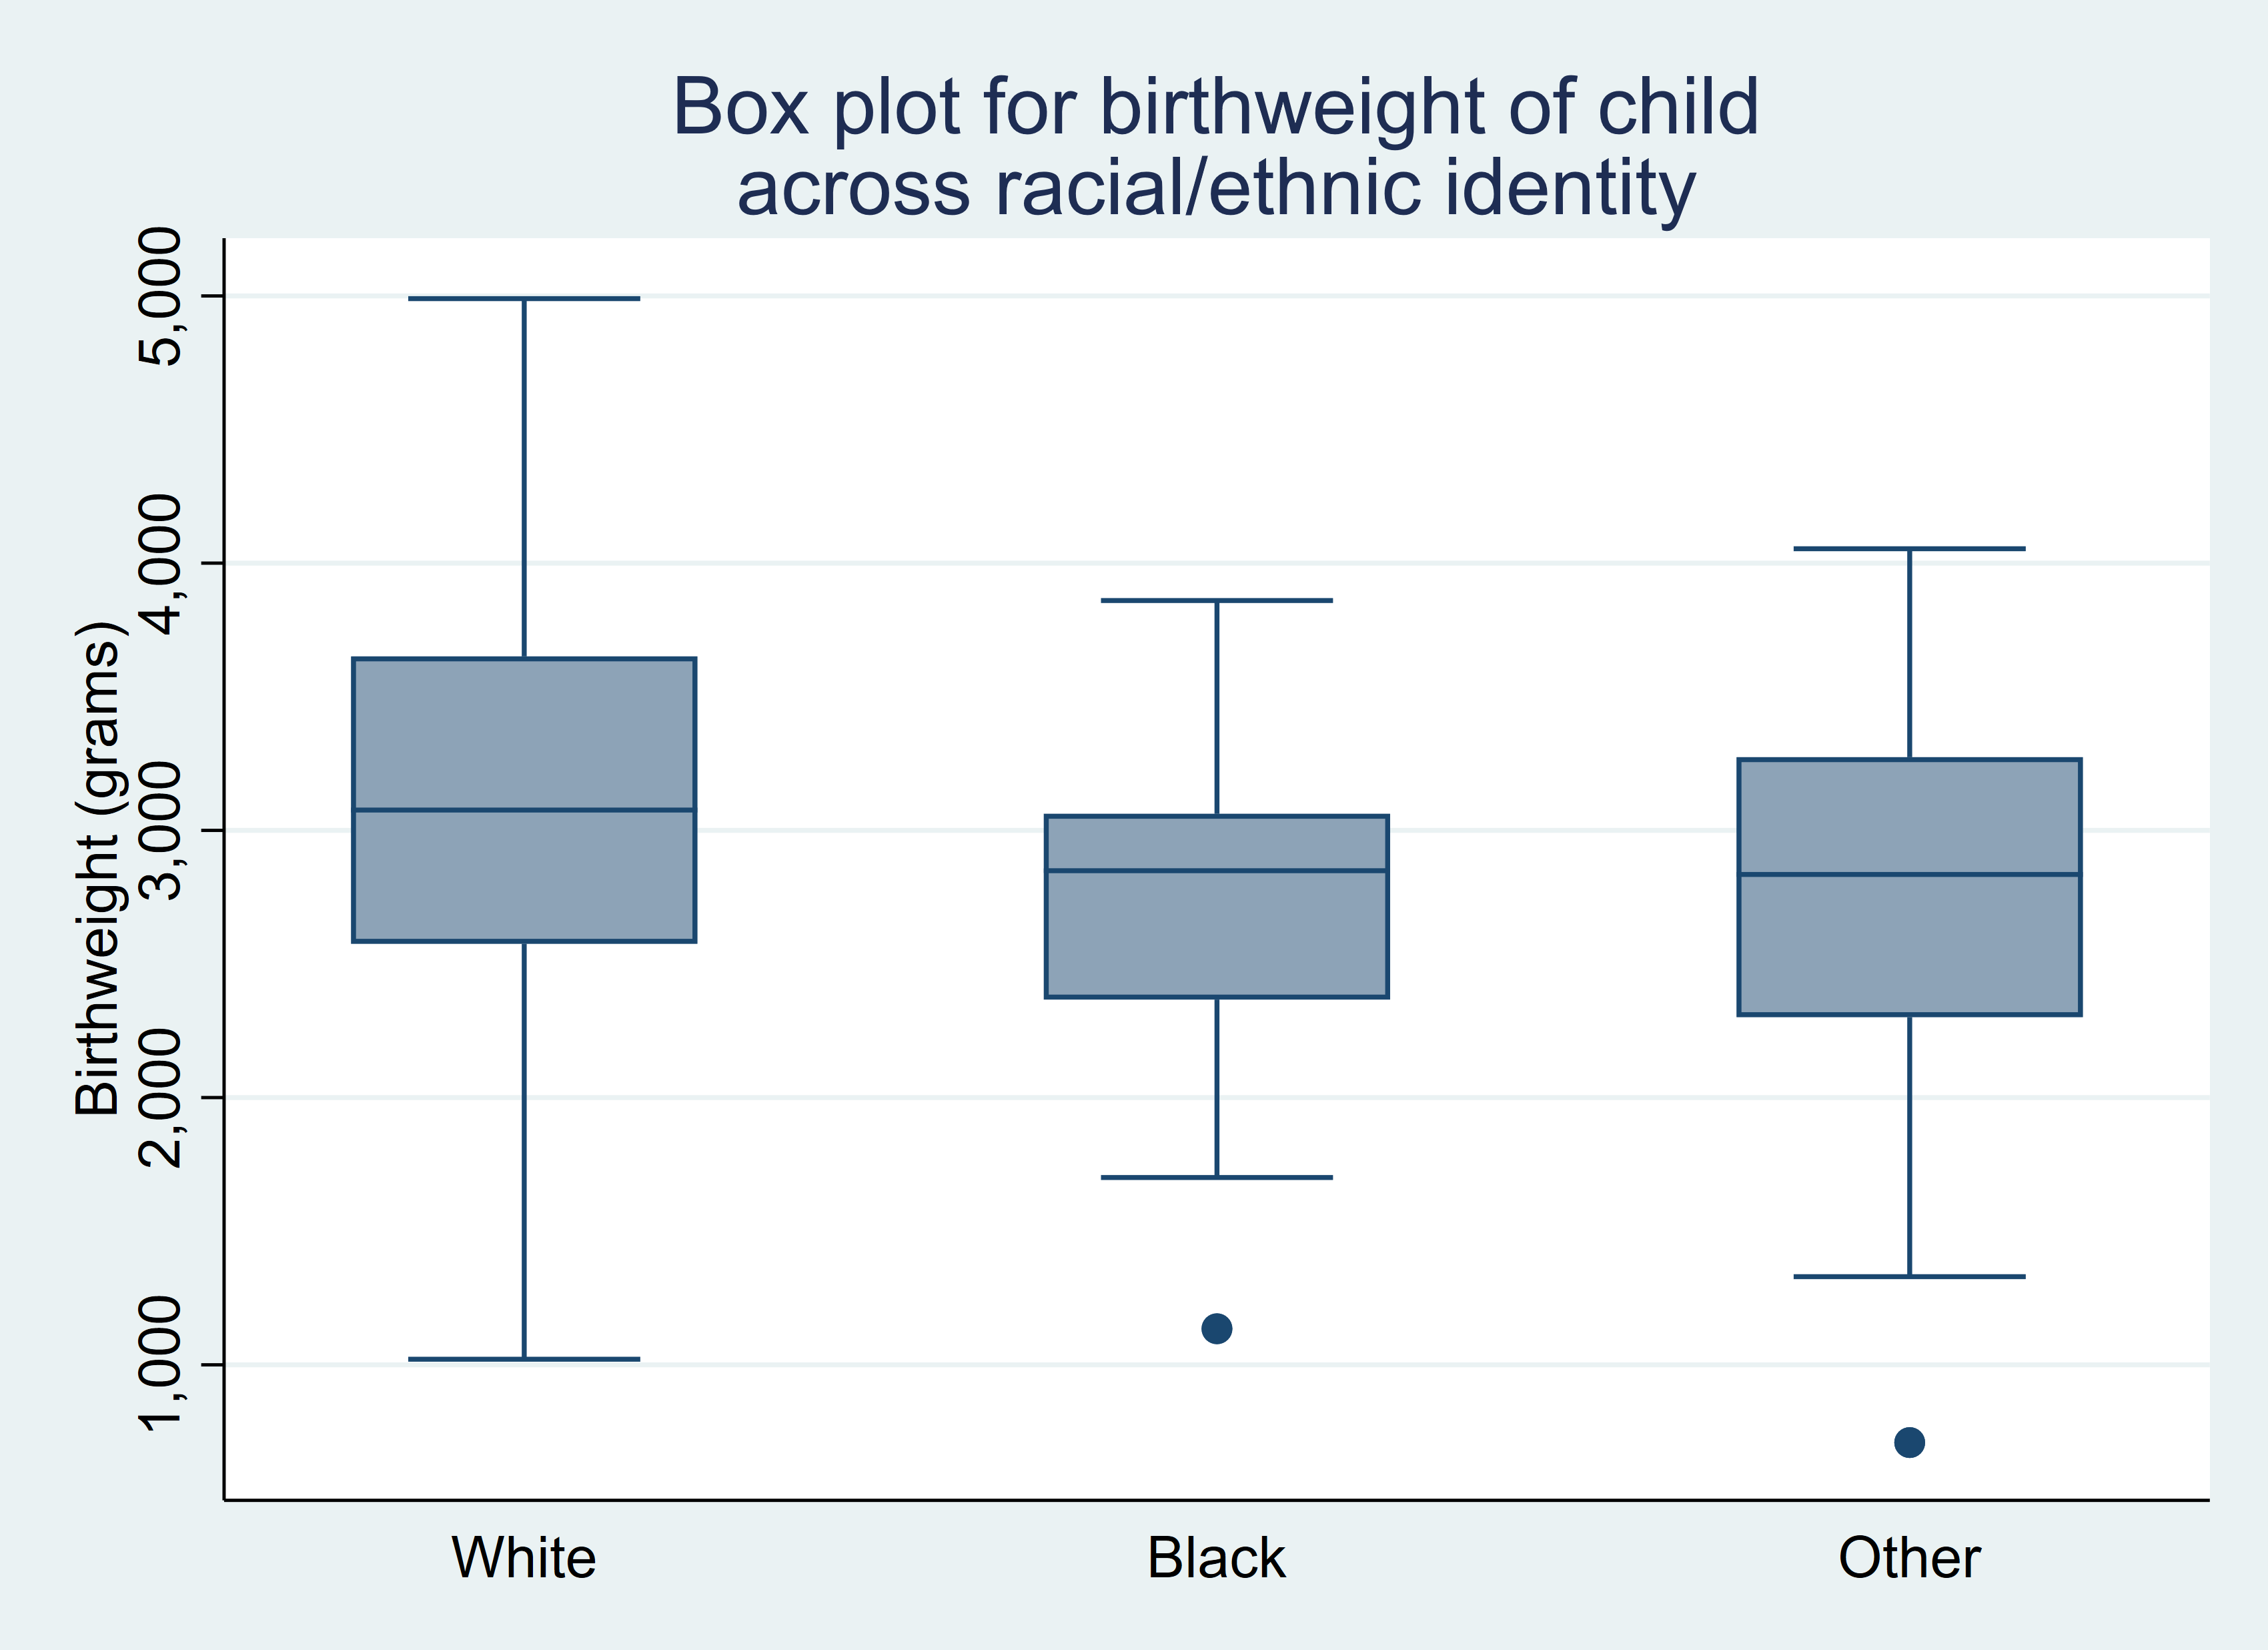

In [37]:
*Descriptive statistics of age
summ age


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
         age |        189     23.2381    5.298678         14         45


In [39]:
*For example, we can tell Stata to do a simple OLS. First let's plot the values between age and birthweight.
scatter bwt age
graph export "bwt_age_scatter.png", replace width(3400)



file C:/Users/acade/.stata_kernel_cache/graph5.svg saved as SVG format
file C:/Users/acade/.stata_kernel_cache/graph5.pdf saved as PDF format

(file bwt_age_scatter.png not found)
file bwt_age_scatter.png saved as PNG format


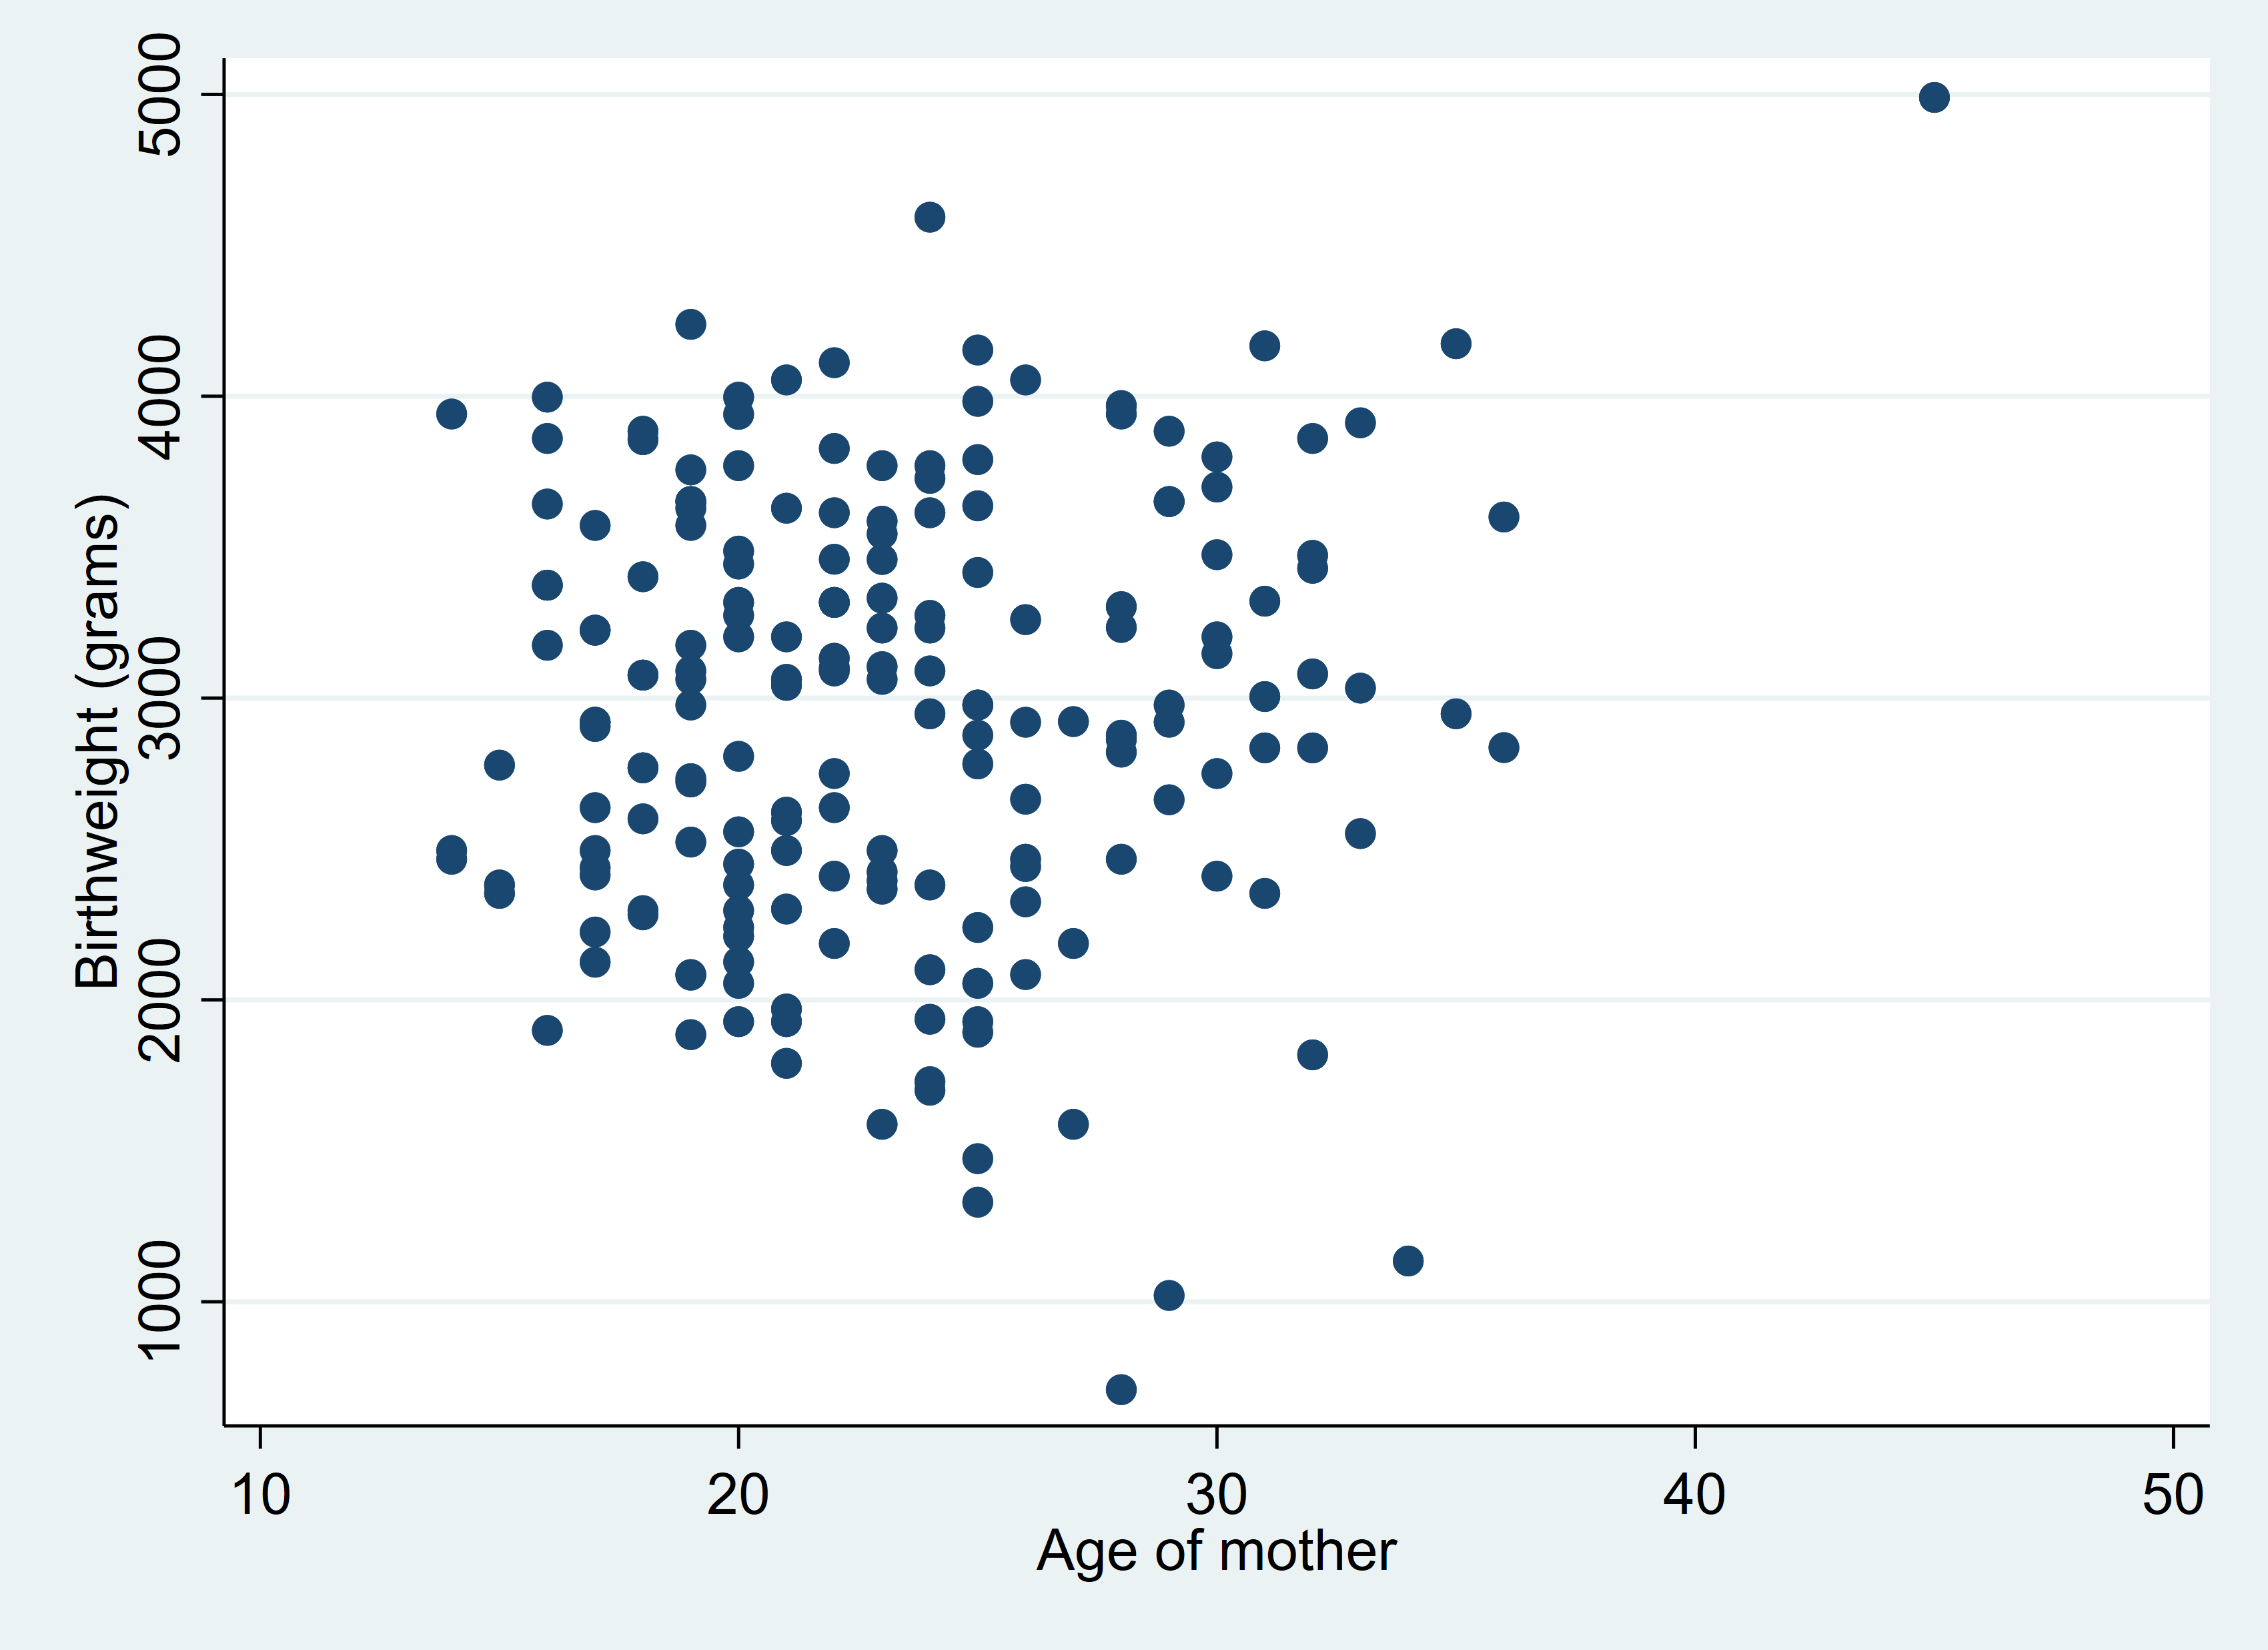

In [40]:
*This is basic OLS command
regress bwt age
*This makes a yhat variable where yhat = 2658.12 + 12.34 * (age of observation)
predict yhat



      Source |       SS           df       MS      Number of obs   =       189
-------------+----------------------------------   F(1, 187)       =      1.51
       Model |  800428.169         1  800428.169   Prob > F        =    0.2207
    Residual |  99114870.4       187  530026.045   R-squared       =    0.0080
-------------+----------------------------------   Adj R-squared   =    0.0027
       Total |  99915298.6       188  531464.354   Root MSE        =    728.03

------------------------------------------------------------------------------
         bwt | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
         age |   12.31444   10.02079     1.23   0.221     -7.45389    32.08277
       _cons |   2658.122   238.8097    11.13   0.000     2187.014    3129.229
------------------------------------------------------------------------------

(option xb assumed; fitted values)


<center>$(birthweight)_{i} = \beta_{0} + \beta_{1}(age_{i})$ 
    
<center>$(birthweight)_{i} = 2658.12 + 12.31(age_{i})$ 

$\beta_{0}$ is the intercept represents the overall average of birthweight when age is 0.

$\beta_{1}$ is the slope between age and birthweight. Here it is positive slope meaning as age increases there is a corresponding increase in birthweight. $\beta_{1}$ is not statistically significant (p<.05).

In [41]:
*Let's show the observations and the OLS regression line
twoway (scatter bwt age) ///
    (line yhat age)
graph export "bwt_age_toway.png", replace width(3400)



file C:/Users/acade/.stata_kernel_cache/graph6.svg saved as SVG format
file C:/Users/acade/.stata_kernel_cache/graph6.pdf saved as PDF format

(file bwt_age_toway.png not found)
file bwt_age_toway.png saved as PNG format


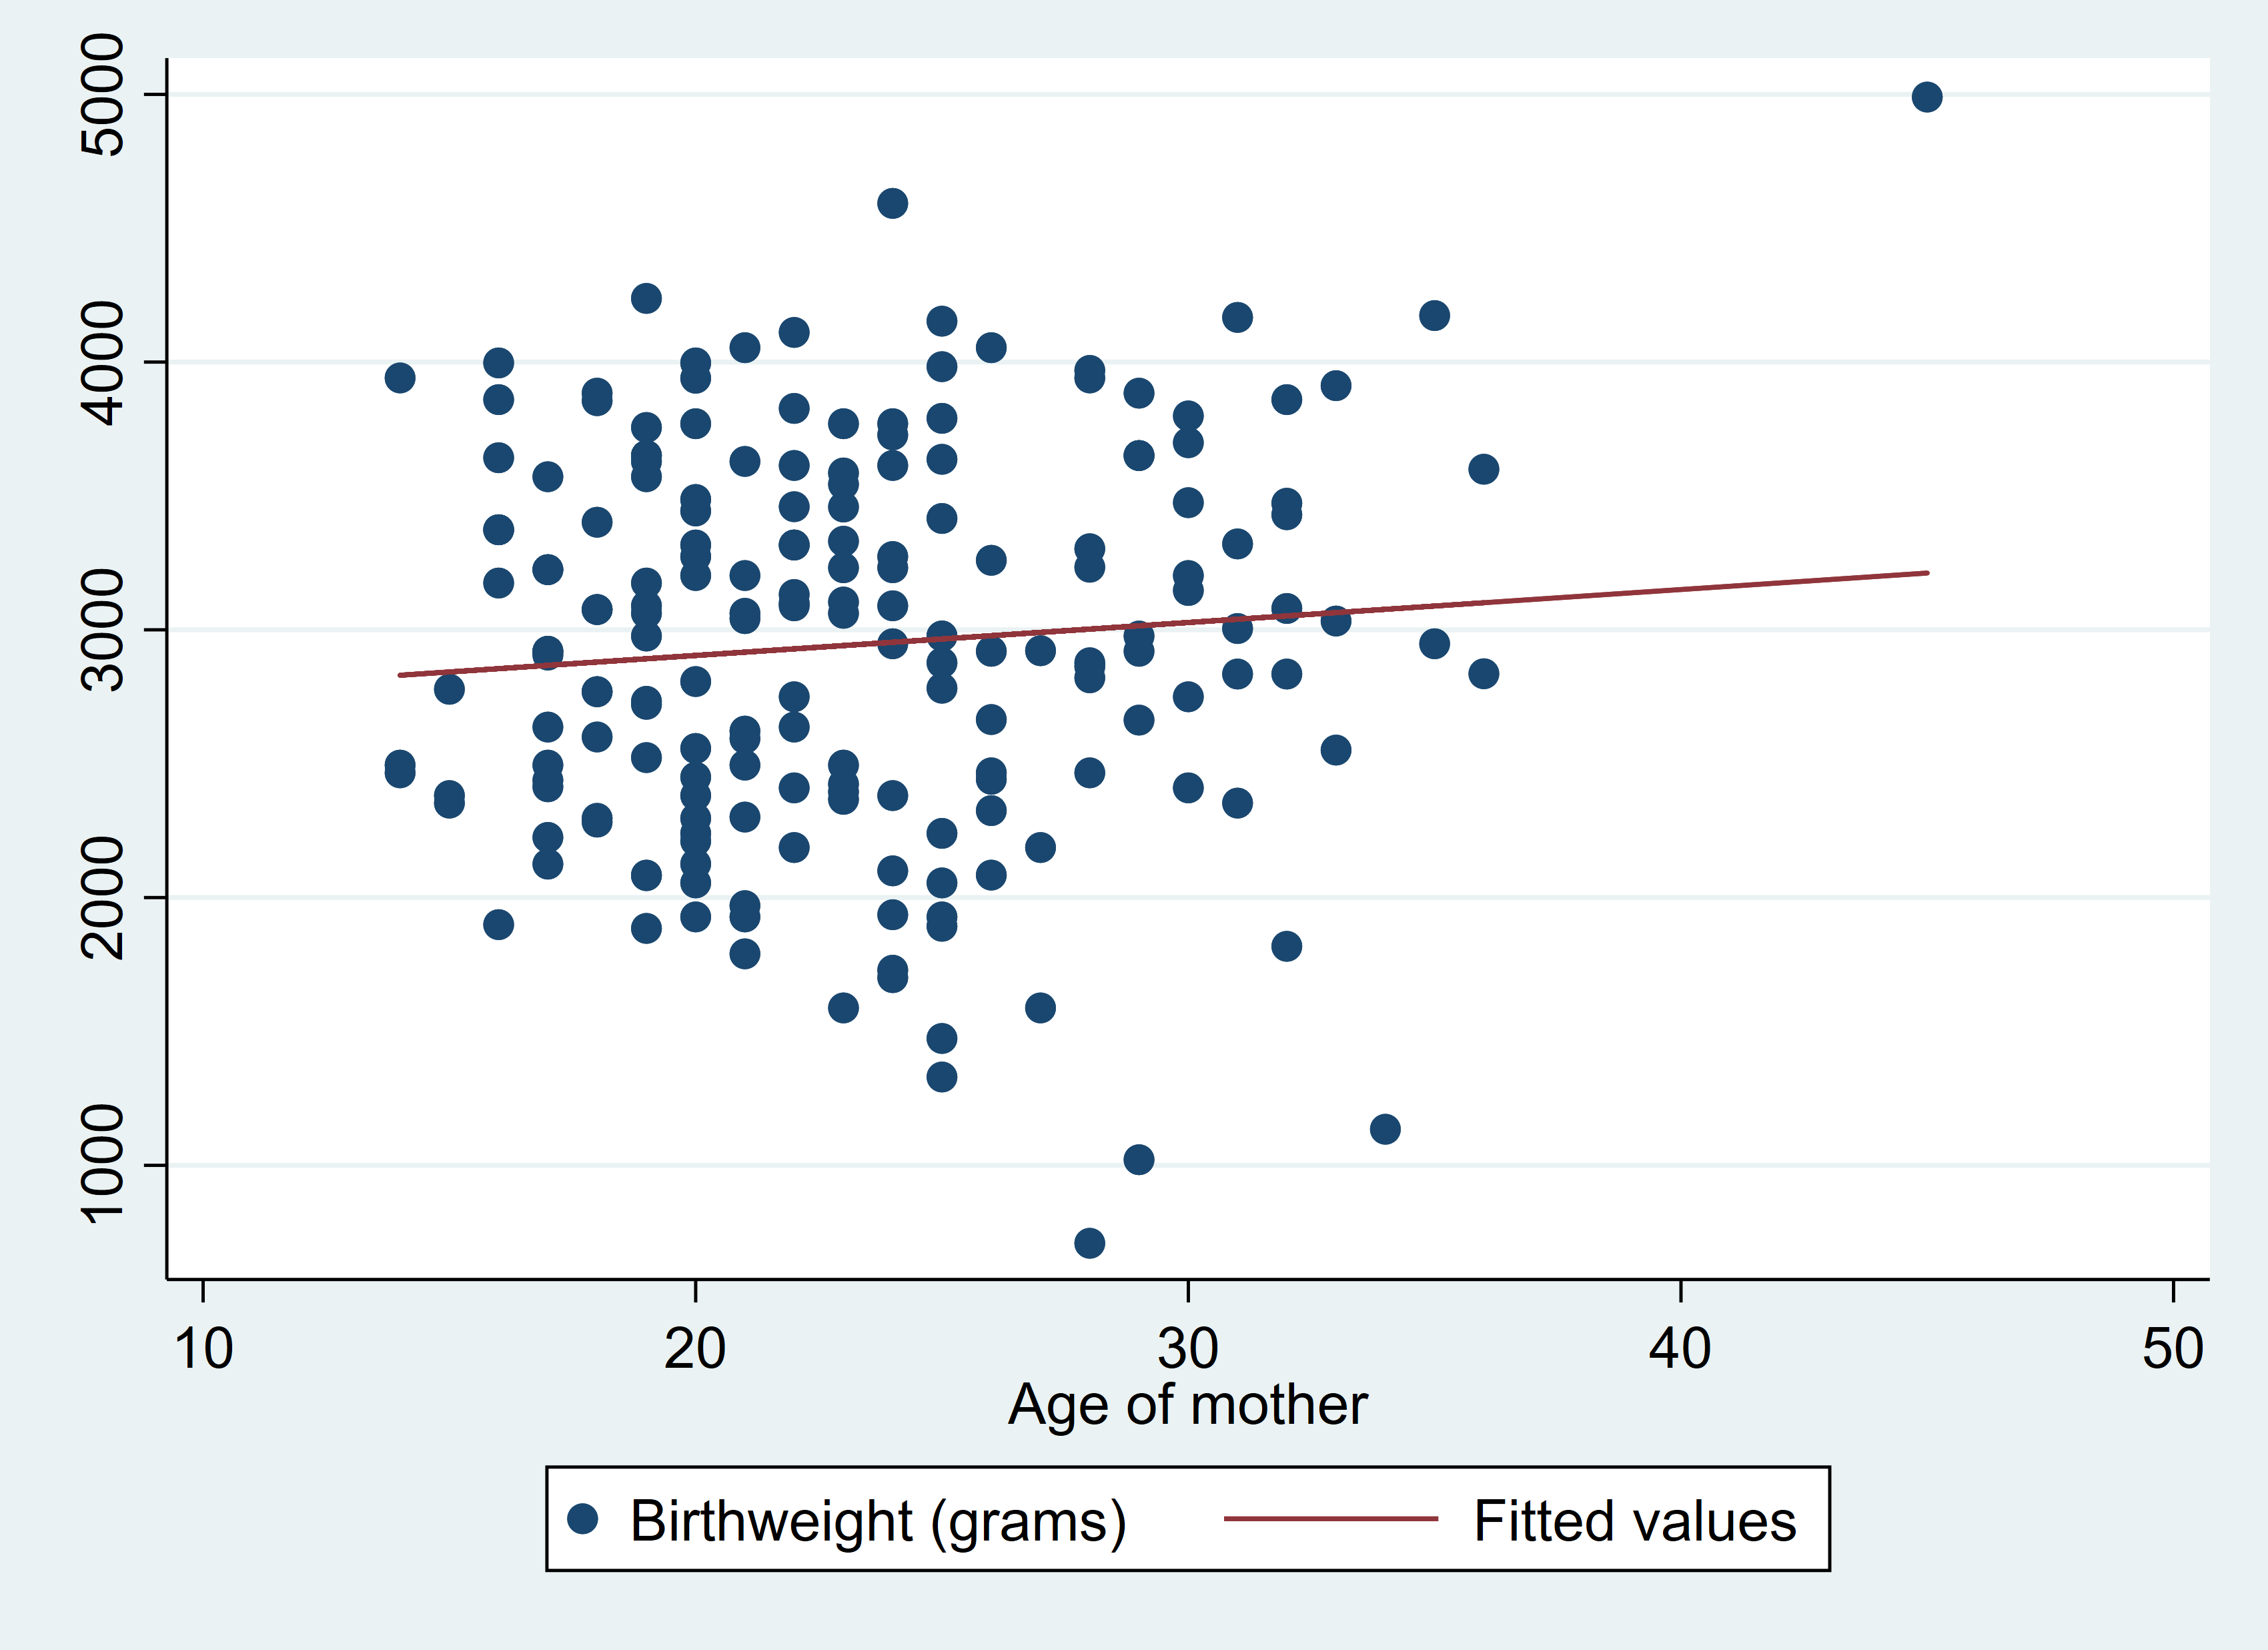

We can have other types of relationships within our regression analyses. One commmon type is curvilinear relationships. The way to input these relationships into your regression is simiply by transforming the variable.

<center>$(birthweight)_{i} = \beta_{0} + \beta_{1}(age_{i}) + \beta_{1}(age^{2}_{i})$ 

In [42]:
*I am using a shortcut command to add a quadratic
regress bwt age c.age#c.age
*This makes a yhat variable where yhat = 2658.12 + 12.34 * (age of observation)
predict yhat_curvilinear



      Source |       SS           df       MS      Number of obs   =       189
-------------+----------------------------------   F(2, 186)       =      3.89
       Model |   4007561.9         2  2003780.95   Prob > F        =    0.0222
    Residual |  95907736.7       186  515632.993   R-squared       =    0.0401
-------------+----------------------------------   Adj R-squared   =    0.0298
       Total |  99915298.6       188  531464.354   Root MSE        =    718.08

------------------------------------------------------------------------------
         bwt | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
         age |  -151.2227    66.3142    -2.28   0.024    -282.0474   -20.39809
             |
 c.age#c.age |   3.253674   1.304625     2.49   0.014     .6799088    5.827439
             |
       _cons |   4610.534   817.5263     5.64   0.000     2997.718     6223.35
-------------------

In [43]:
*Let's show the observations and the OLS regression line
twoway (scatter bwt age) ///
    (qfit yhat_curvilinear age)
graph export "bwt_age__age2_toway.png", replace width(3400)



file C:/Users/acade/.stata_kernel_cache/graph7.svg saved as SVG format
file C:/Users/acade/.stata_kernel_cache/graph7.pdf saved as PDF format

file bwt_age__age2_toway.png saved as PNG format


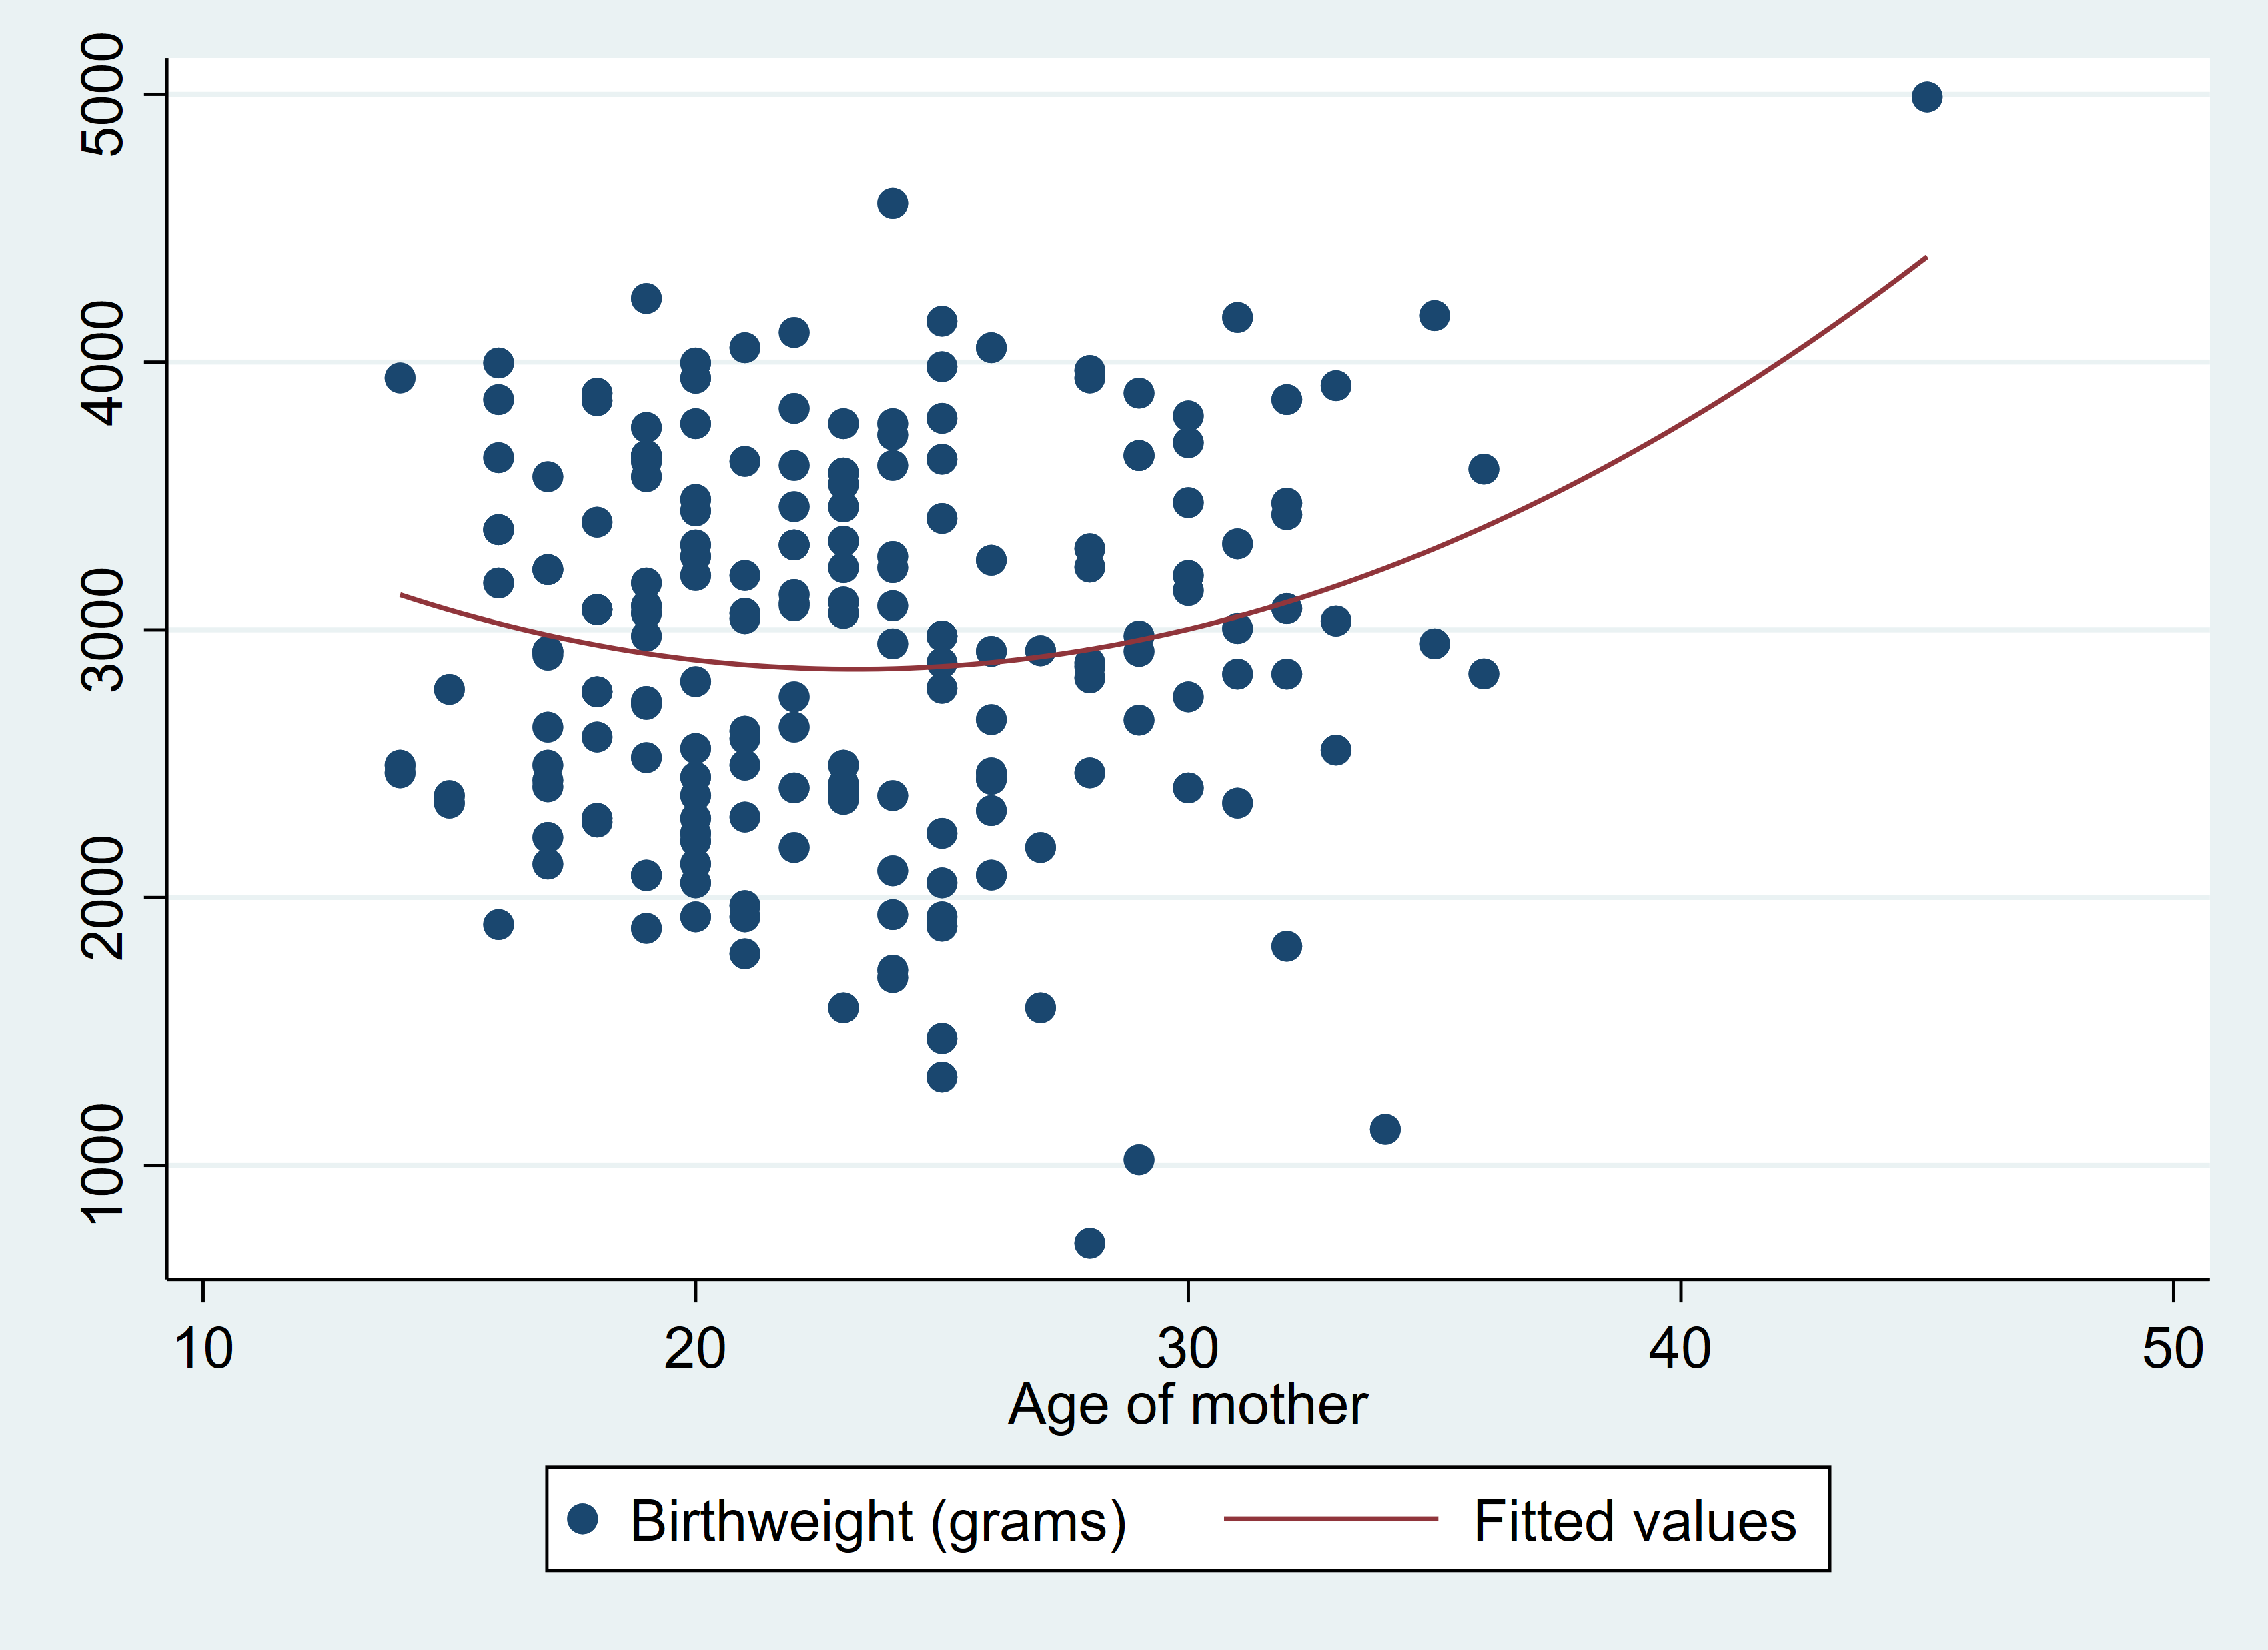

# Practice time

Download data from catcourses and save into your "week 2 folder". This data comes from the [CalEnviroScreen 4.0](https://oehha.ca.gov/calenviroscreen). This data is of San Diego and Imperial counties.

<b>Variables</b>

* CensusTract - census id tract
* TotalPopulation - total pop of the census tract
* CaliforniaCounty - name of the county
* ZIP - ZIP of tract
* PM25 - Annual mean PM2.5 concentrations
* Astham - Age-adjusted rate of emergency department visits for asthma
* LowBirthWeight - Percent low birth weight
* CardiovascularDisease - Age-adjusted rate of emergency department visits for heart attacks per 10,000
* LinguisticIsolation - Percent limited English speaking households
* Poverty - Poverty of population living below tow times the federal poverty level

<b>Questions</b>
* Open the dataset into Stata. Identify at least one numeric variable. Identify at least one categorical variable.
* Run a model with PM2.5 as the dependent variable. Use asthma, low birth weight, and linguistic isolation as independent variables. 
* Write a sentence explaining the direction and significance statistical for each independent variable coefficient.
* Make a scatter plot between asthma and PM2.5.

In [44]:
*Then open it in Stata
use "ces_sd_imperial.dta", clear
desc




Contains data from ces_sd_imperial.dta
 Observations:           658                  
    Variables:            10                  23 Jan 2023 14:49
--------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
--------------------------------------------------------------------------------
CensusTract     double  %10.0g                Census Tract
TotalPopulation long    %10.0g                Total Population
CaliforniaCou~y str15   %15s                  California County
ZIP             long    %10.0g                ZIP
PM25            double  %10.0g                PM2.5
Asthma          double  %10.0g                Asthma
LowBirthWeight  double  %10.0g                Low Birth Weight
Cardiovascula~e double  %10.0g                Cardiovascular Disease
LinguisticIso~n double  %10.0g                Linguistic Isolation
Poverty         double  %10.0g             

PM2.5 is a numeric variable. CaliforniaCounty is a categorical variable.

In [45]:
regress PM25 Asthma LowBirthWeight LinguisticIsolation


      Source |       SS           df       MS      Number of obs   =       637
-------------+----------------------------------   F(3, 633)       =      5.75
       Model |  24.9571829         3  8.31906095   Prob > F        =    0.0007
    Residual |  916.025982       633  1.44711845   R-squared       =    0.0265
-------------+----------------------------------   Adj R-squared   =    0.0219
       Total |  940.983165       636  1.47953328   Root MSE        =     1.203

-------------------------------------------------------------------------------
         PM25 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
--------------+----------------------------------------------------------------
       Asthma |   .0061996   .0020482     3.03   0.003     .0021774    .0102217
LowBirthWei~t |   .0258688   .0369725     0.70   0.484    -.0467348    .0984724
LinguisticI~n |   .0048846   .0060734     0.80   0.422    -.0070418    .0168111
        _cons |   10.12578    .176278    57.

Based on the result output, we find that an increase in age-adjusted rate of emergency department visits for asthmas leads to a statistically significant increase to annual mean of PM 2.5 concentrations. However, low-birth weight has a non-significant positive relationship with PM 2.5 concentration. Additionally, the relationship between the percentage of linguistic isolation and PM 2.5 is positive, but insignificant.

In [46]:
twoway(scatter PM25 Asthma)
graph export "PM25_asthma_toway.png", replace width(3400)



file C:/Users/acade/.stata_kernel_cache/graph8.svg saved as SVG format
file C:/Users/acade/.stata_kernel_cache/graph8.pdf saved as PDF format

file PM25_asthma_toway.png saved as PNG format


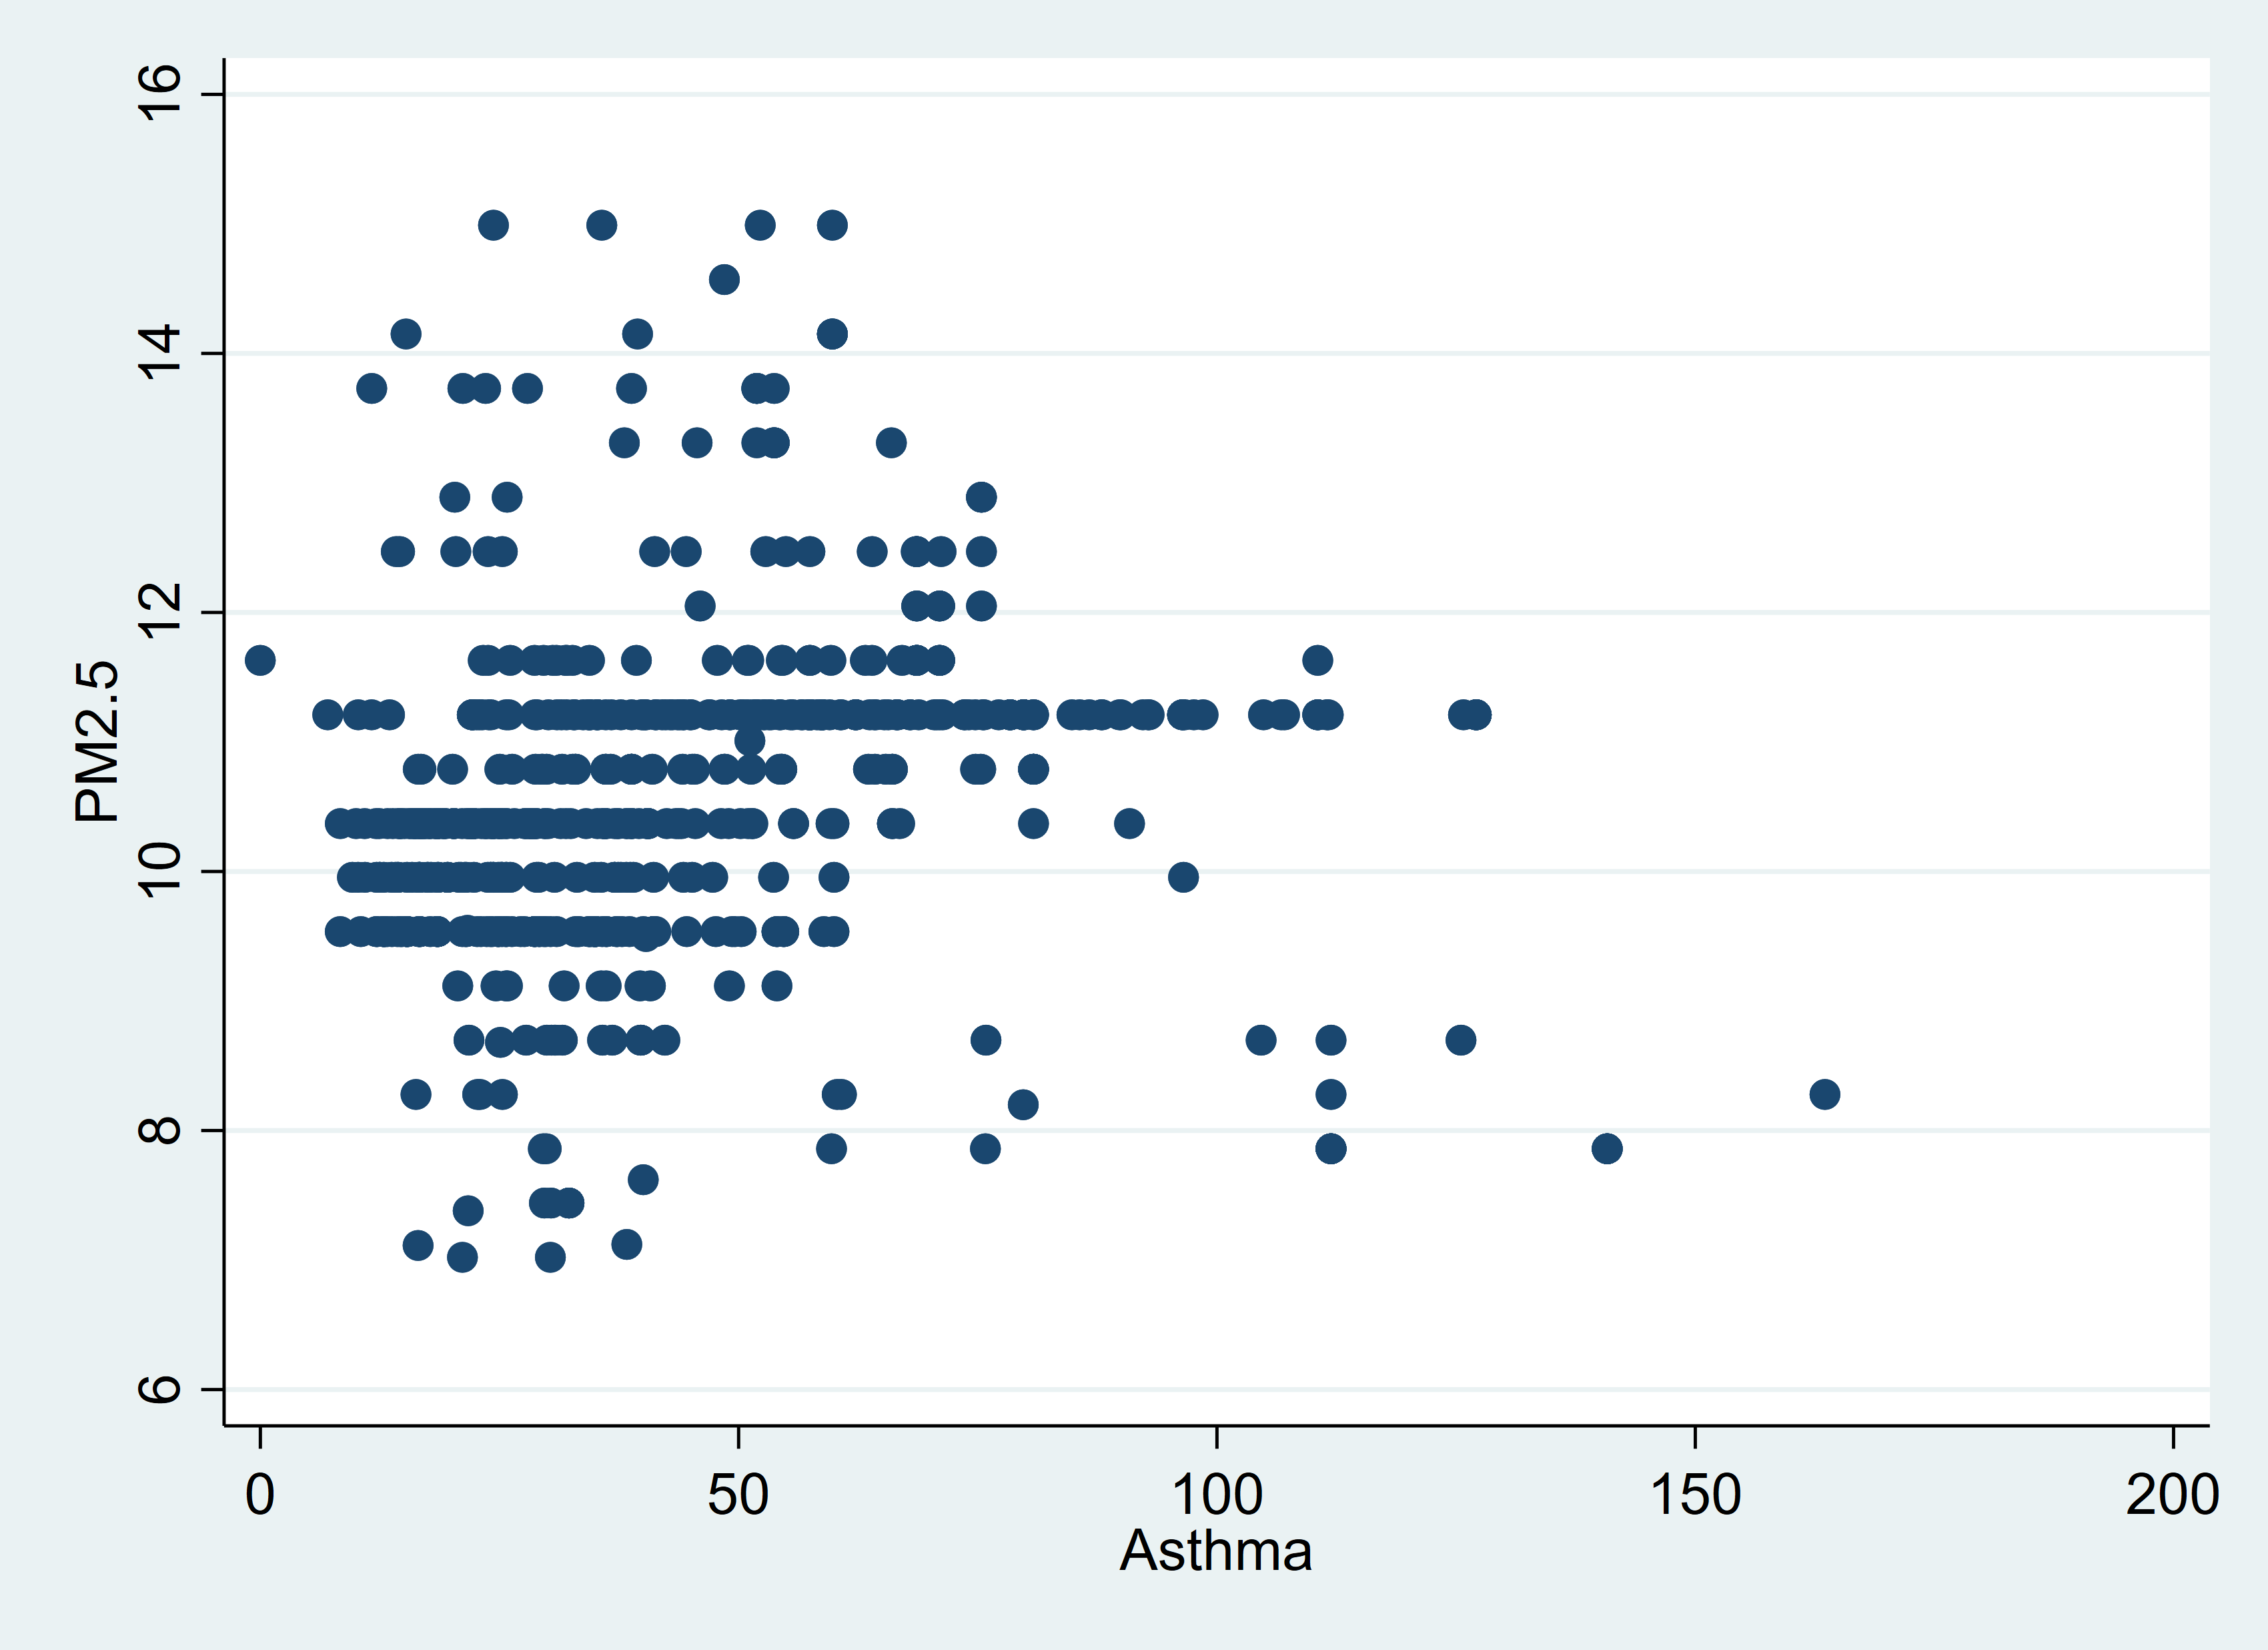